In [1]:
from scipy import stats
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
class GumbelCopula:
    def __init__(self, theta):
        self.theta = theta

    def cdf(self, u, v):
        return np.exp(
            -(
                ((-np.log(u)) ** self.theta + (-np.log(v)) ** self.theta)
                ** (1 / self.theta)
            )
        )

    def pdf(self, u, v):
        mlogu = -np.log(u)
        mlogv = -np.log(v)
        log_sum_theta = mlogu**self.theta + mlogv**self.theta
        return (
            self.cdf(u, v)
            * (1 / (u * v))
            * mlogu ** (self.theta - 1)
            * mlogv ** (self.theta - 1)
            * (
                log_sum_theta ** (2 / self.theta - 2)
                - self.theta
                * (1 / self.theta - 1)
                * (log_sum_theta ** (1 / self.theta - 2))
            )
        )
    
# Test pdf function

# gumbel = GumbelCopula(3)
# step = 0.001

# der_u = lambda u, v: (gumbel.cdf(u + step, v) - gumbel.cdf(u - step, v)) / (2 * step)
# der_uv = lambda u, v: (der_u(u, v + step) - der_u(u, v - step)) / (2 * step)
# mx = 0
# indexes = []
# for i in np.linspace(0,1, 20)[1:-1]:
#     for j in np.linspace(0,1, 20)[1:-1]:
#         a = der_uv(i, j)
#         b = gumbel.pdf(i, j)
#         if abs(a - b) > mx:
#             mx = abs(a - b)
#             indexes = [i, j]
# print(f"max value reached with {i}, {j}: {(a := der_uv(i, j))} ~ {(b := gumbel.pdf(i, j))} -> {a - b}")

# k = 50

# print(sum([gumbel.pdf(i, j) for i in np.linspace(0,1, k + 1)[1:-1] for j in np.linspace(0,1, k + 1)[1:-1]]) * 1 / k **2)

# print("grid values")
# for i in np.linspace(0,1, 10)[1:-1]:
#     for j in np.linspace(0,1, 10)[1:-1]:
#         print(round(gumbel.pdf(i, j), 3), end = "\t")
#     print("\n")

In [10]:
class FGMCopula:
    def __init__(self, theta) -> None:
        self.theta = theta
    
    def cdf(self, u, v):
        return u * v + u*v * self.theta * (1-u) * (1-v)
    
    def pdf(self, u, v):
        return 1 + self.theta * (1 - 2*u) * (1 - 2*v)


# Test pdf function

fgm = FGMCopula(3)
step = 0.0005

der_u = lambda u, v: (fgm.cdf(u + step, v) - fgm.cdf(u - step, v)) / (2 * step)
der_uv = lambda u, v: (der_u(u, v + step) - der_u(u, v - step)) / (2 * step)
mx = 0
indexes = []
for i in np.linspace(0,1, 20)[1:-1]:
    for j in np.linspace(0,1, 20)[1:-1]:
        a = der_uv(i, j)
        b = fgm.pdf(i, j)
        if abs(a - b) > mx:
            mx = abs(a - b)
            indexes = [i, j]
print(f"max value reached with {i}, {j}: {(a := der_uv(i, j))} ~ {(b := fgm.pdf(i, j))} -> {a - b}")

k = 50

print(sum([fgm.pdf(i, j) for i in np.linspace(0,1, k + 1)[1:-1] for j in np.linspace(0,1, k + 1)[1:-1]]) * 1 / k **2)

print("grid values")
for i in np.linspace(0,1, 10)[1:-1]:
    for j in np.linspace(0,1, 10)[1:-1]:
        print(round(fgm.pdf(i, j), 3), end = "\t")
    print("\n")


max value reached with 0.9473684210526315, 0.9473684210526315: 3.4016620497068217 ~ 3.4016620498614953 -> -1.546736072555177e-10
0.9603999999999998
grid values
2.815	2.296	1.778	1.259	0.741	0.222	-0.296	-0.815	

2.296	1.926	1.556	1.185	0.815	0.444	0.074	-0.296	

1.778	1.556	1.333	1.111	0.889	0.667	0.444	0.222	

1.259	1.185	1.111	1.037	0.963	0.889	0.815	0.741	

0.741	0.815	0.889	0.963	1.037	1.111	1.185	1.259	

0.222	0.444	0.667	0.889	1.111	1.333	1.556	1.778	

-0.296	0.074	0.444	0.815	1.185	1.556	1.926	2.296	

-0.815	-0.296	0.222	0.741	1.259	1.778	2.296	2.815	



In [21]:
def sample_distribution(d, n):
    """
    Generate a set of points that approximate a given probability distribution
    and projects them to the unit interval.

    Args:
    d: A scipy.stats distribution object
    n: Number of points to generate

    Returns:
    An array of n points sampled from the distribution
    """
    # Generate evenly spaced probabilities
    probs = np.linspace(0, 1, n+2)[1:-1]

    # Use the percent point function (inverse of cdf) to get the corresponding values
    points = d.ppf(probs)
    points = (points - np.min(points)) / (np.max(points) - np.min(points))
    return points


def _add_3d_gumbel_copula_plot(d_1, d_2, theta, fig):
    u = sample_distribution(d_1, 100)
    v = sample_distribution(d_2, 100)
    U, V = np.meshgrid(u, v)
    gumbel_copula = GumbelCopula(theta).cdf
    Z = gumbel_copula(U, V)
    ax = fig.add_subplot(121, projection="3d")  # Modified line
    ax.plot_surface(U, V, Z, cmap="viridis")


def _add_2d_gumbel_copula_plot(d_1, d_2, theta, fig):
    u = sample_distribution(d_1, 100)
    v = sample_distribution(d_2, 100)
    U, V = np.meshgrid(u, v)
    gumbel_copula = GumbelCopula(theta).cdf
    Z = gumbel_copula(U, V)
    ax = fig.add_subplot(122)  # Modified line
    ax.contourf(U, V, Z, cmap="viridis")


def plot_gumbel_copula(d_1, d_2, theta):
    fig = plt.figure()
    _add_3d_gumbel_copula_plot(d_1, d_2, theta, fig)
    _add_2d_gumbel_copula_plot(d_1, d_2, theta, fig)
    plt.show()

def plot_copula_density(d_1, d_2, copula):
    u = sample_distribution(d_1, 20)
    v = sample_distribution(d_2, 20)
    U, V = np.meshgrid(u, v)
    Z = copula.pdf(U, V)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")  # Modified line
    ax.plot_surface(U, V, Z, cmap="viridis")
    plt.show()

C:\Users\valer\AppData\Local\Temp\ipykernel_23916\3927137288.py:14: RuntimeWarning: divide by zero encountered in log
  mlogu = -np.log(u)
C:\Users\valer\AppData\Local\Temp\ipykernel_23916\3927137288.py:15: RuntimeWarning: divide by zero encountered in log
  mlogv = -np.log(v)
C:\Users\valer\AppData\Local\Temp\ipykernel_23916\3927137288.py:8: RuntimeWarning: divide by zero encountered in log
  ((-np.log(u)) ** self.theta + (-np.log(v)) ** self.theta)
C:\Users\valer\AppData\Local\Temp\ipykernel_23916\3927137288.py:19: RuntimeWarning: divide by zero encountered in divide
  * (1 / (u * v))
C:\Users\valer\AppData\Local\Temp\ipykernel_23916\3927137288.py:18: RuntimeWarning: invalid value encountered in multiply
  self.cdf(u, v)
C:\Users\valer\AppData\Local\Temp\ipykernel_23916\3927137288.py:23: RuntimeWarning: divide by zero encountered in reciprocal
  log_sum_theta ** (2 / self.theta - 2)
C:\Users\valer\AppData\Local\Temp\ipykernel_23916\3927137288.py:26: RuntimeWarning: divide by zero enc

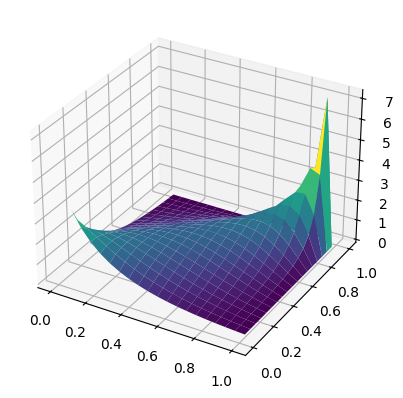

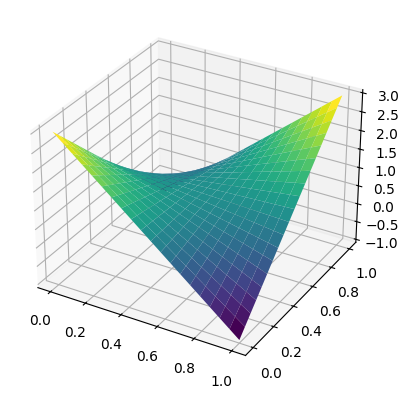

In [22]:
uniform_1 = stats.uniform(0, 1)
uniform_2 = stats.uniform(0, 1)

plot_copula_density(d_1=uniform_1, d_2=uniform_2, copula=GumbelCopula(2))

plot_copula_density(d_1=uniform_1, d_2=uniform_2, copula=FGMCopula(2))


In [23]:
# gauss_1 = stats.norm(3, 1)
# gauss_2 = stats.norm(3, 5)

# plot_gumbel_copula(d_1=gauss_1, d_2=gauss_2, theta=2)


# plot_gumbel_copula(d_1=uniform_1, d_2=uniform_2, theta=1)